In [1]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

# 1. Load metadata

In [2]:
from relgen.data.metadata import Metadata

metadata = Metadata()
metadata.load_from_json("../datasets/single_table_demo/metadata.json")

print(metadata)

tables:
{'student': {'columns': {'id': {'type': 'id'}, 'name': {'type': 'categorical'}, 'age': {'type': 'numerical'}}, 'primary_key': 'id'}}
relationships:
[]


# 2. Load data

In [3]:
import pandas as pd

data = {
    "student": pd.read_csv("../datasets/single_table_demo/student.csv")
}

data["student"].head(10)

,id,name,age
0,0,jlv,37
1,1,vyD,34
2,2,Gev,31
3,3,hKU,44
4,4,ZOK,29
5,5,BTP,45
6,6,JPB,29
7,7,jge,43
8,8,GoP,28
9,9,ouv,37


# 3. Data conversion

In [4]:
from relgen.data.dataset import Dataset

dataset = Dataset(metadata)
dataset.fit(data)

# 4. Data synthesizer

In [5]:
from relgen.synthesizer.arsynthesizer import MADESynthesizer
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

synthesizer = MADESynthesizer(dataset)
synthesizer.fit(data)

table student start training
epoch 0: train loss 12.803, time cost 0.019s
epoch 1: train loss 12.647, time cost 0.006s
epoch 2: train loss 12.747, time cost 0.005s
epoch 3: train loss 12.703, time cost 0.005s
epoch 4: train loss 12.570, time cost 0.005s
epoch 5: train loss 12.534, time cost 0.005s
epoch 6: train loss 12.450, time cost 0.005s
epoch 7: train loss 12.472, time cost 0.005s
epoch 8: train loss 12.318, time cost 0.005s
epoch 9: train loss 12.305, time cost 0.005s
epoch 10: train loss 12.405, time cost 0.005s
epoch 11: train loss 12.403, time cost 0.005s
epoch 12: train loss 12.280, time cost 0.005s
epoch 13: train loss 11.827, time cost 0.005s
epoch 14: train loss 12.233, time cost 0.005s
epoch 15: train loss 11.655, time cost 0.005s
epoch 16: train loss 11.636, time cost 0.005s
epoch 17: train loss 11.803, time cost 0.005s
epoch 18: train loss 11.940, time cost 0.005s
epoch 19: train loss 11.986, time cost 0.005s
epoch 20: train loss 11.906, time cost 0.005s
epoch 21: train

# 5. Generate data

In [6]:
sampled_data = synthesizer.sample()

sampled_data["student"].head(10)

,id,name,age
0,0,Avt,46
1,1,vVf,44
2,2,PHx,42
3,3,zOy,44
4,4,qIt,49
5,5,CCQ,49
6,6,JtZ,37
7,7,gUV,34
8,8,zOy,23
9,9,JzC,37


# 6. Evaluate the generated data

In [14]:
from relgen.evaluator import Evaluator

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
evaluator = Evaluator(data["student"], sampled_data["student"])

In [8]:
evaluator.eval_fidelity()

{'JS_distance Mean': 0.4122667838690391,
 'JS_distance Std': 0.0,
 'JS_distance Max': 0.4122667838690391,
 'JS_distance Min': 0.4122667838690391,
 'WD_distance Mean': 0.29,
 'WD_distance Std': 0.29,
 'WD_distance Max': 0.58,
 'WD_distance Min': 0.0,
 'Diff.Corr Mean': 0.09179524202356482,
 'Discriminator Measure': 0.5}

In [9]:
evaluator.eval_privacy()

{'DCR 5 percentile': 0.0, 'NNDR 5 percentile': 0.0}

In [10]:
evaluator.eval_diversity()

{'Sampling Diversity': 0.76}

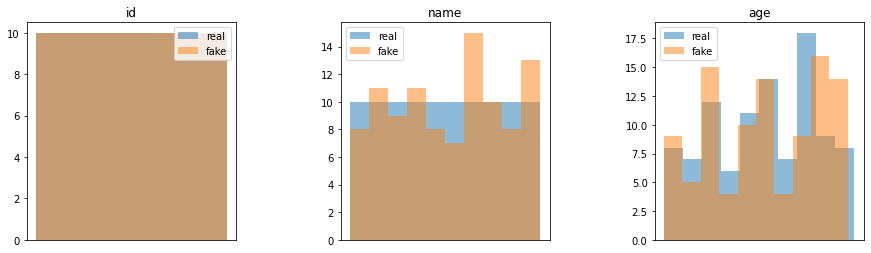

In [13]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
evaluator.eval_histogram()

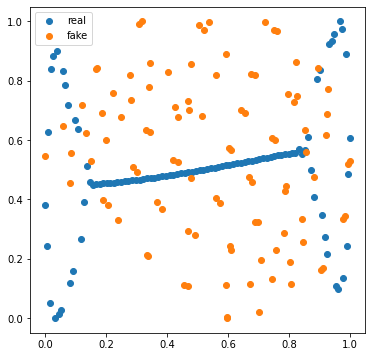

In [12]:
evaluator.eval_tsne()